In [180]:
import torch
import torch.nn as nn
import torch.optim as optim
import pandas as pd
import matplotlib.pyplot as plt


# Data Preparation 

In [3]:
data: pd.DataFrame = pd.read_csv("data.csv", index_col=0)
print(data.head())

          y        x1        x2        x3        x4        x5        x6  \
0  7.824944 -0.887890  0.949137  0.867185  0.905457 -0.564753  1.064772   
1 -0.284809  0.402109 -0.109812  0.353789 -0.368996  0.484929 -0.872589   
2 -5.551631 -0.114545 -1.603722  0.284455 -0.276847 -1.421414 -1.135600   
3  0.087262  0.832631  0.443724  0.472880  1.260798  0.589971 -0.150165   
4  0.169201  0.318175 -0.042458  0.014656  0.323378  0.425665  0.268726   

         x7        x8        x9       x10  
0  0.871957  0.073367 -0.468684 -1.518201  
1 -0.305881 -0.284581  0.547374 -0.755235  
2 -0.021529 -0.826239  0.647715 -2.370580  
3  1.148314  1.034029 -0.205375 -0.488831  
4  0.177851 -0.128694  0.110501  0.797469  


### Displaying X1-X5:

In [23]:
data_copy = data.copy()
X  = data_copy['x1']
y = data_copy['y']

X2 = data_copy['x2']
y2 = data_copy['y']

X3 = data_copy['x3']
y3 = data_copy['y']

X4 = data_copy['x4']
y4 = data_copy['y']

X5 = data_copy['x5']
y5 = data_copy['y']

In [68]:
# print(X)
# print('------------')
# print(X2)
# print('------------')
# print(X3)
# print('------------')
# print(X4)
# print('------------')
# print(X5)

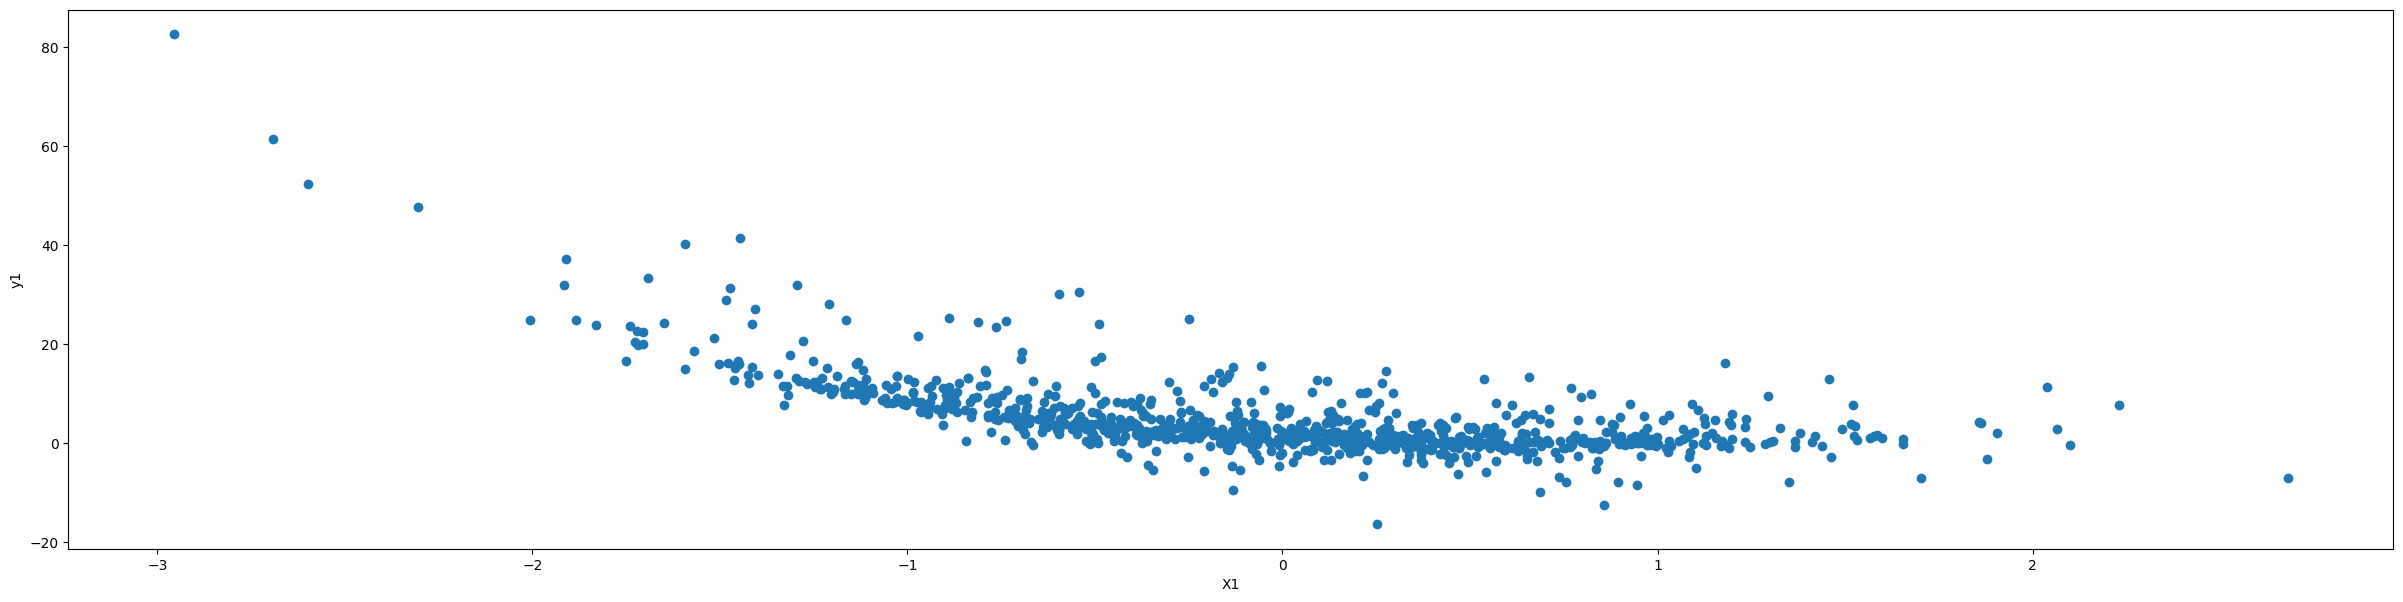

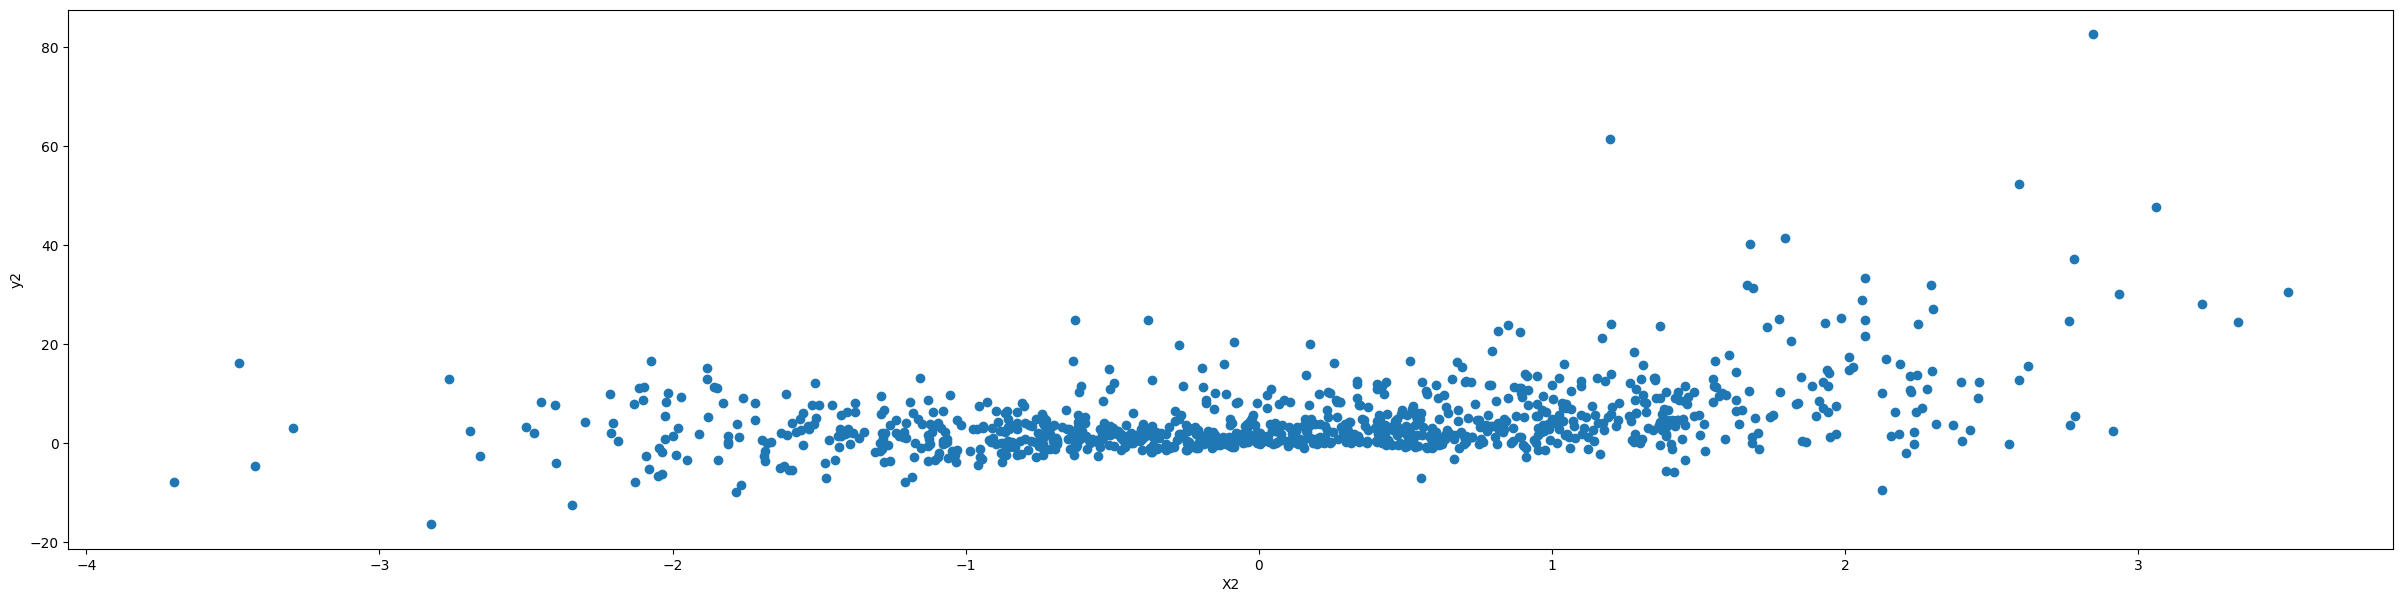

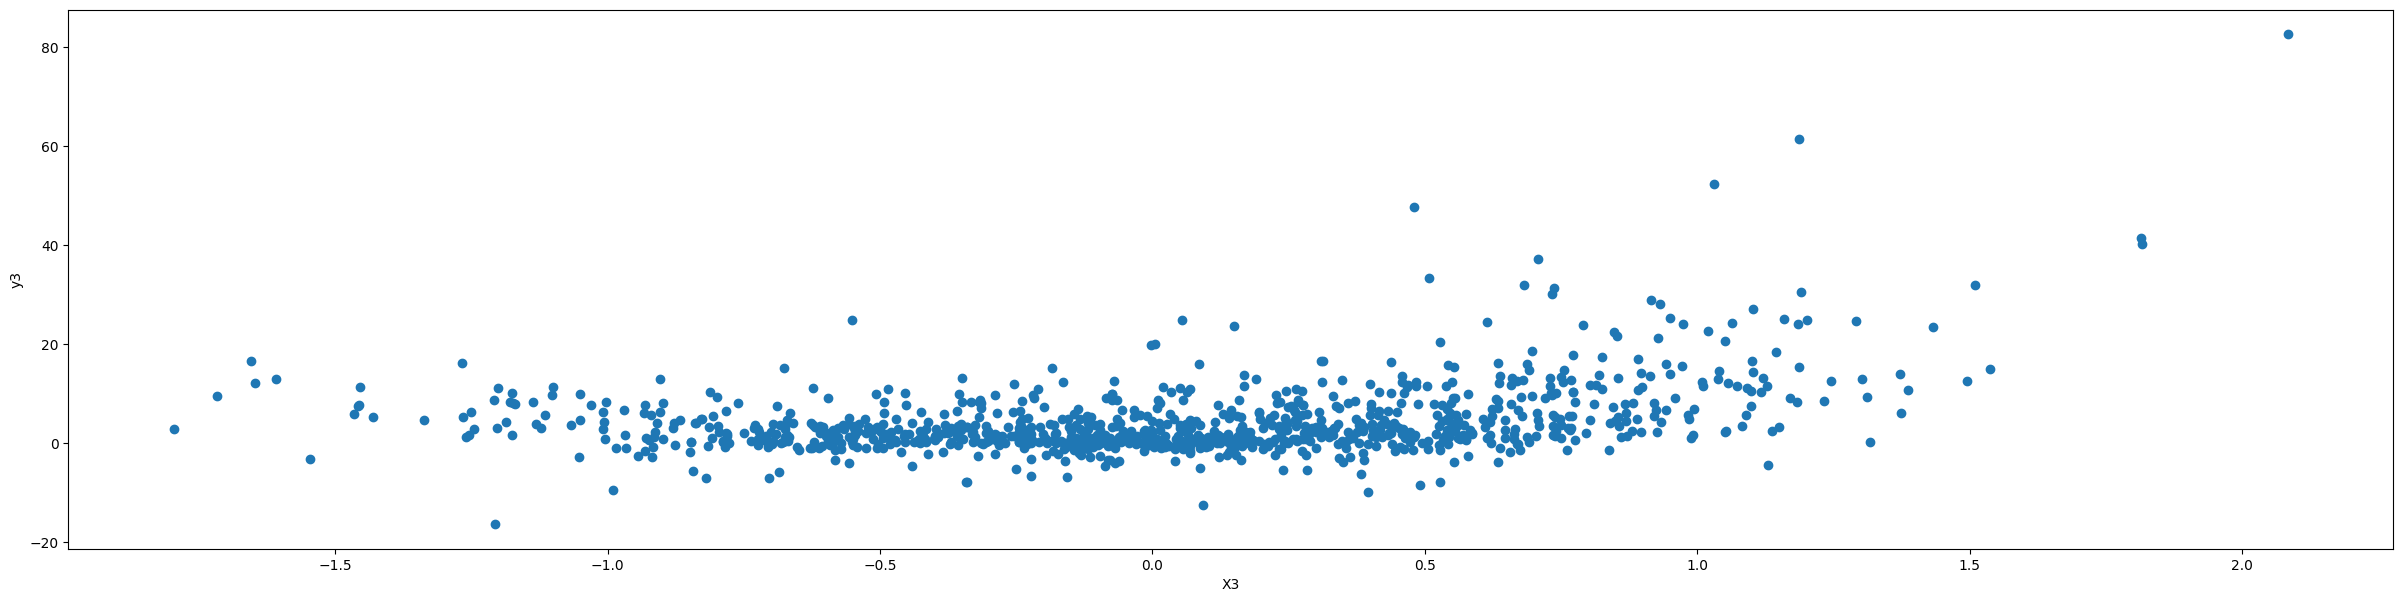

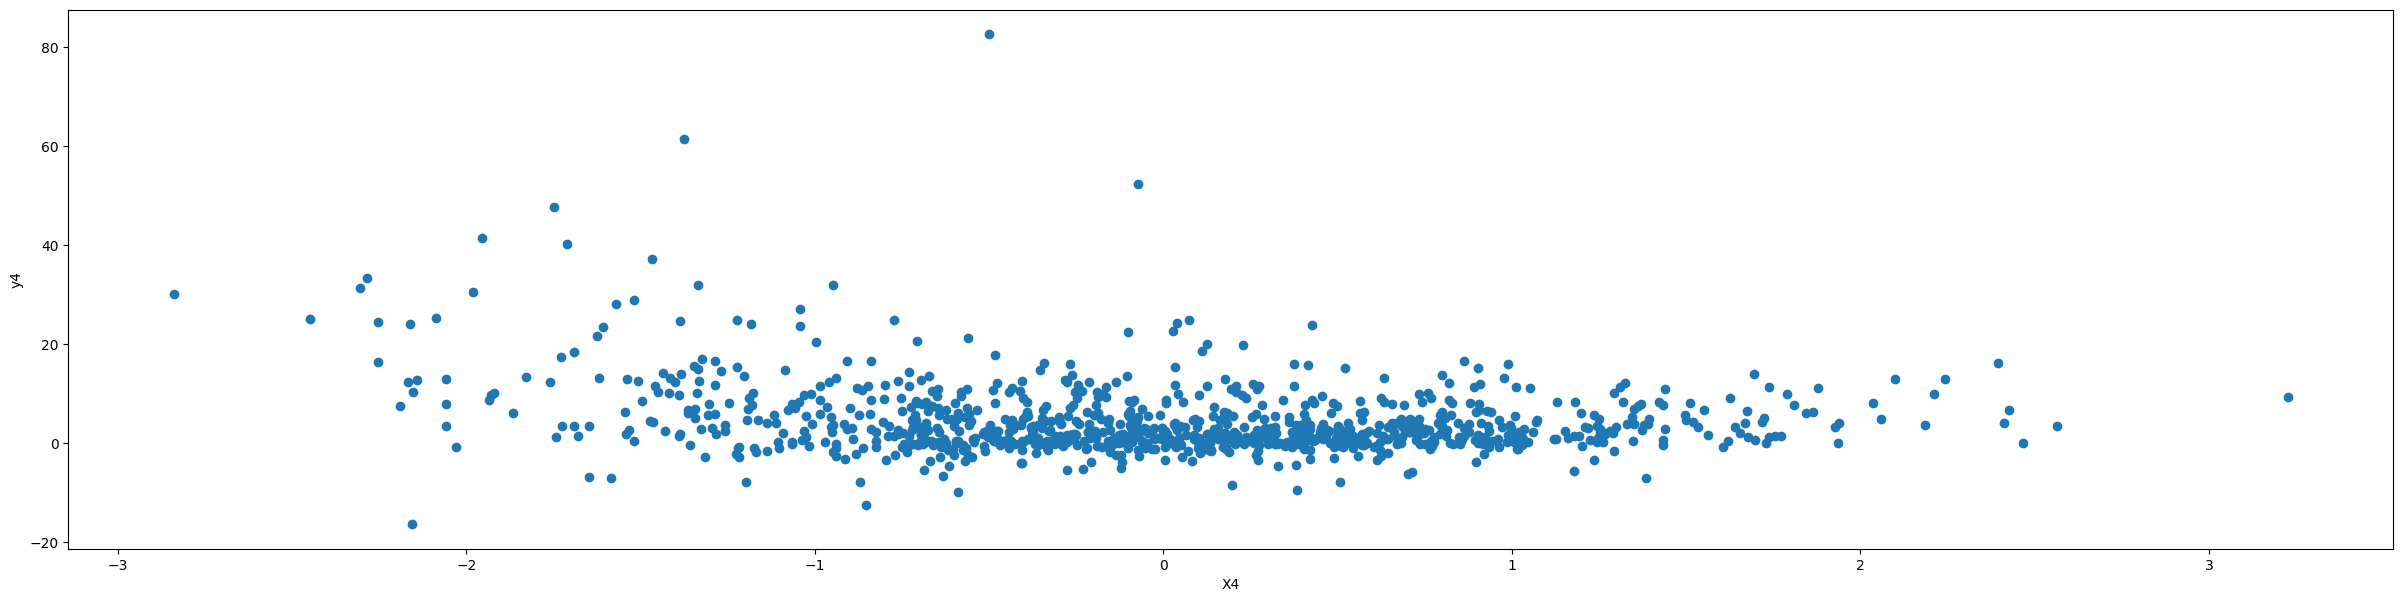

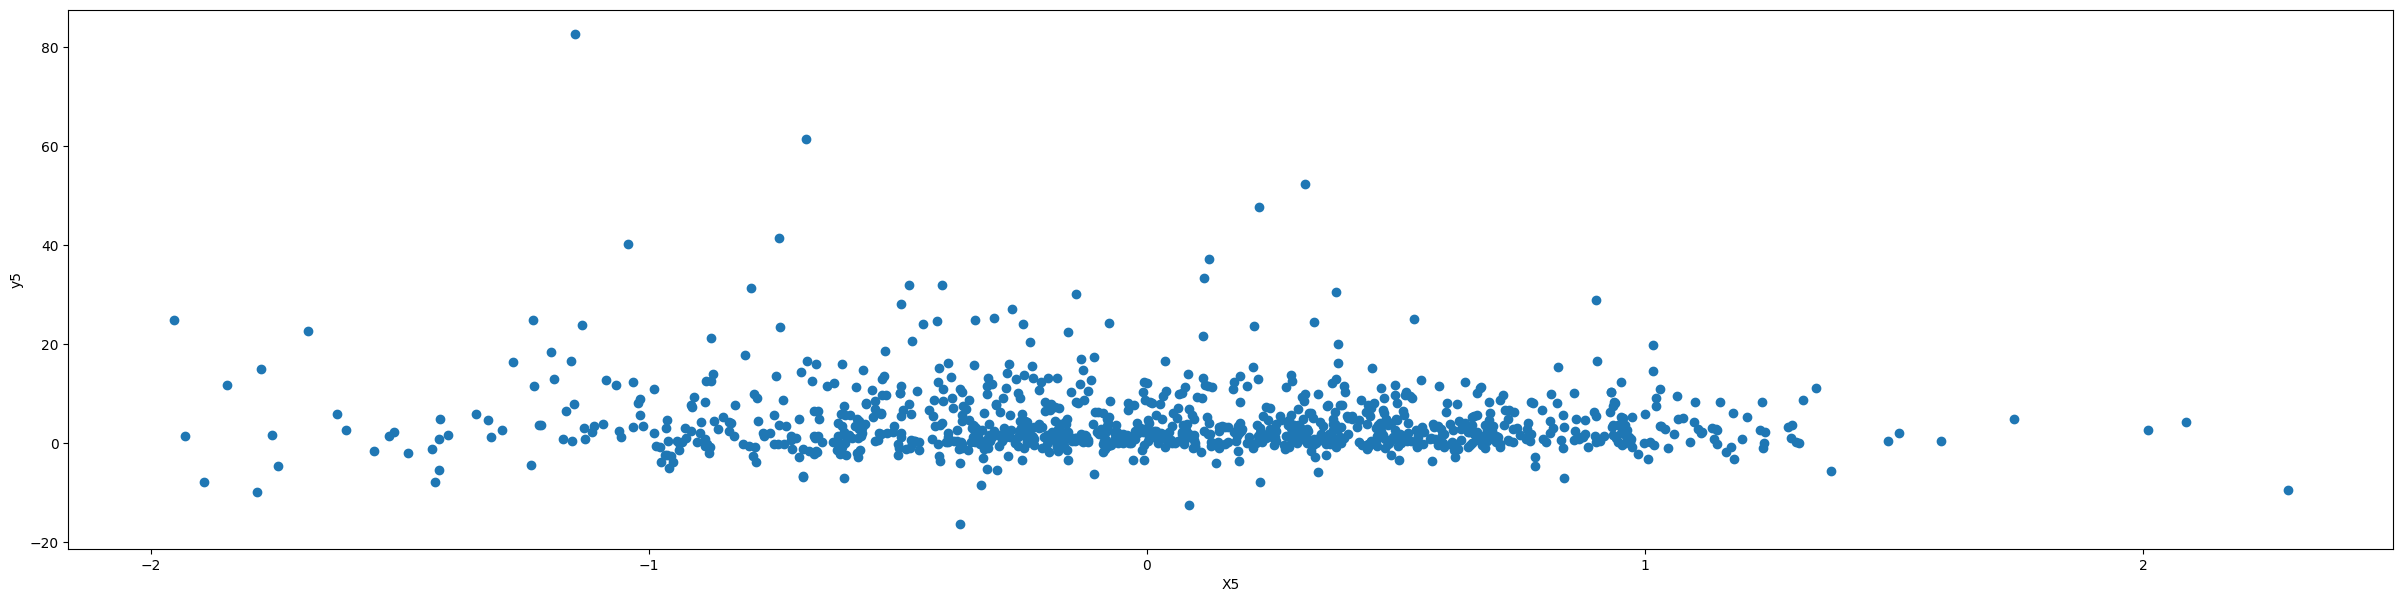

In [26]:
plt.figure(figsize = (30,7))
plt.scatter(X, y)
plt.xlabel("X1")
plt.ylabel("y1")
plt.show()

plt.figure(figsize = (30,7))
plt.scatter(X2, y2)
plt.xlabel("X2")
plt.ylabel("y2")
plt.show()

plt.figure(figsize = (30,7))
plt.scatter(X3, y3)
plt.xlabel("X3")
plt.ylabel("y3")
plt.show()

plt.figure(figsize = (30,7))
plt.scatter(X4, y4)
plt.xlabel("X4")
plt.ylabel("y4")
plt.show()

plt.figure(figsize = (30,7))
plt.scatter(X5, y5)
plt.xlabel("X5")
plt.ylabel("y5")
plt.show()

In [91]:
#fn Creating train and test data
def splitting_datasets(X, y):
    splitter = int(0.8*len(X))
    X_train, y_train = X[:splitter],y[:splitter]
    X_test, y_test = X[splitter:], y[splitter:]

    # print(f"Train Length: {len(X_train)}")
    # print(f"Test Length: {len(X_test)}")


    X_test=torch.tensor(X_test.values)
    y_test = torch.tensor(y_test.values)
    X_train= torch.tensor(X_train.values)
    y_train=torch.tensor(y_train)
    return X_test, X_train, y_test, y_train



In [130]:
X_test, X_train, y_test, y_train = splitting_datasets(X, y)
X2_test, X2_train, y2_test, y2_train = splitting_datasets(X2,y2)
X3_test, X3_train, y3_test, y3_train = splitting_datasets(X3,y3)
X4_test, X4_train, y4_test, y4_train = splitting_datasets(X4,y4)
X5_test, X5_train, y5_test, y5_train = splitting_datasets(X5,y5)




# print(f"{X1_test.dtype}")
# print(f"{y1_test.dtype}")
# print(f"{X1_train.dtype}")
# print(f"{y1_train.dtype}")

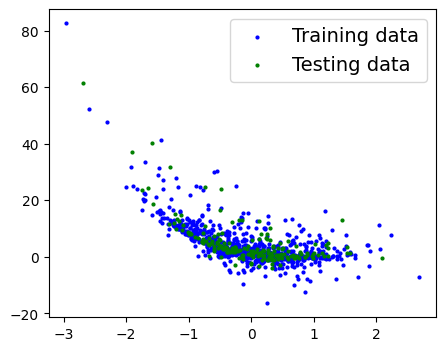

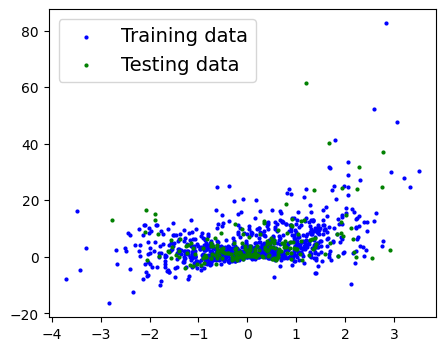

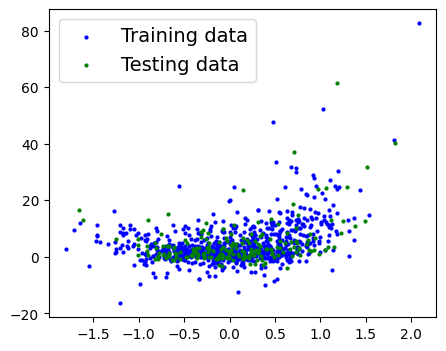

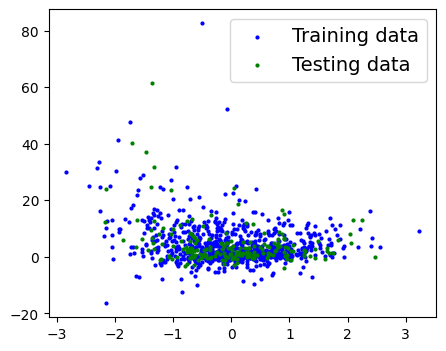

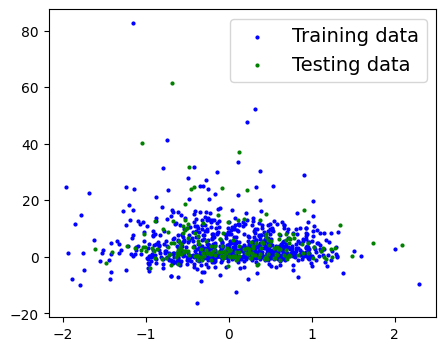

In [148]:
def plot_predictions(train_data: torch.Tensor,
                     train_labels: torch.Tensor,
                     test_data: torch.Tensor,
                     test_labels: torch.Tensor,
                     predictions: torch.Tensor = None):
    plt.figure(figsize=(5, 4))

    plt.scatter(train_data, train_labels, c="b", s=4, label="Training data")
    
    plt.scatter(test_data, test_labels, c="g", s=4, label="Testing data")

    if predictions is not None:
        plt.scatter(test_data, predictions, c="r", s=4, label="Predictions")
        
    plt.legend(prop={"size": 14});

plot_predictions(train_data=X_train, train_labels=y_train, test_data=X_test, test_labels=y_test)
plot_predictions(train_data=X2_train, train_labels=y2_train, test_data=X2_test, test_labels=y2_test)
plot_predictions(train_data=X3_train, train_labels=y3_train, test_data=X3_test, test_labels=y3_test)
plot_predictions(train_data=X4_train, train_labels=y4_train, test_data=X4_test, test_labels=y4_test)
plot_predictions(train_data=X5_train, train_labels=y5_train, test_data=X5_test, test_labels=y5_test)




# Model preparation, training, evaluation and prediction

### Building Model 1:

In [94]:
#using Polynomial Regression Model
import torch
import torch.nn as nn
class PolynomialRegressionModel(nn.Module):
    def __init__(self, *args, **kwargs) -> None:
        super().__init__(*args, **kwargs)
        self.a = nn.Parameter(torch.randn(1, 
            requires_grad=True, 
            dtype=torch.float32 
        ))
        self.b = nn.Parameter(torch.randn(1, 
            requires_grad=True, 
            dtype=torch.float32 
        ))
        self.c = nn.Parameter(torch.randn(1, 
            requires_grad=True, 
            dtype=torch.float32 
        ))

    def forward(self, x: torch.Tensor):
        y = (x**2 )*self.a + x*self.b + self.c #quadratic formula: y=ax^2+bx+c
        return y


In [100]:
model_1 = PolynomialRegressionModel()
print(f"Model_1 Parameters: {list(model_1.parameters())}")
print('-------------------------')
print(f"Named Parameters: {model_1.state_dict()}")

Model_1 Parameters: [Parameter containing:
tensor([0.3577], requires_grad=True), Parameter containing:
tensor([-1.0292], requires_grad=True), Parameter containing:
tensor([0.7701], requires_grad=True)]
-------------------------
Named Parameters: OrderedDict([('a', tensor([0.3577])), ('b', tensor([-1.0292])), ('c', tensor([0.7701]))])


In [173]:
#predicting y values (from polynomial equation)
with torch.inference_mode():
    y_preds = model_1(X_test)

print(f"Predicted values: {y_preds}")

with torch.inference_mode():
    y3_preds = model_1(X3_test)

print(f"Predicted values: {y3_preds}")

with torch.inference_mode():
    y4_preds = model_1(X4_test)

print(f"Predicted values: {y4_preds}")

Predicted values: tensor([ 2.9700, 15.4977,  3.4850,  2.3695,  2.3814,  2.5082,  3.7338, 11.4929,
         2.6338,  3.3725, 14.8875,  2.5564,  2.8485,  6.2591,  8.4827,  5.5015,
         2.8491,  4.1647,  8.4732,  5.9522,  3.9513,  2.3901,  2.9471,  4.2425,
         2.9717,  3.7513,  4.5988,  2.4860,  2.5746,  6.7113,  2.7236,  2.6798,
         3.1619,  8.4918,  3.9638,  2.3993,  7.0414, 11.4784, 10.0929,  2.7677,
         7.8494,  3.9535,  3.3489,  4.8725,  3.1059,  2.3529,  3.4786,  4.8753,
         3.2987,  3.1935,  2.5106,  8.1378,  3.9842,  3.1212,  5.0204,  8.0990,
         4.6640, 14.5630,  3.4306,  6.5273,  2.3773,  4.2259,  2.8721,  2.3831,
         5.4471,  2.6092,  3.7555,  3.2400,  2.7115,  2.4152,  2.4515,  2.6427,
         2.7514,  2.5835,  3.5196,  2.4722,  3.2564,  2.5154,  2.5344,  2.5105,
         9.2263,  3.0070, 10.9017,  2.3487, 16.0047,  2.3506,  2.9097,  2.3505,
         2.4071,  4.9838,  2.3742,  2.3682,  4.7081, 11.5264,  3.2520,  2.5182,
         2.9556,  3.11

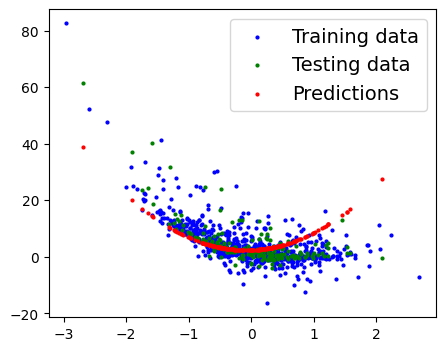

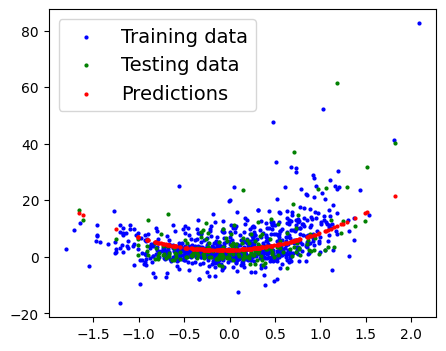

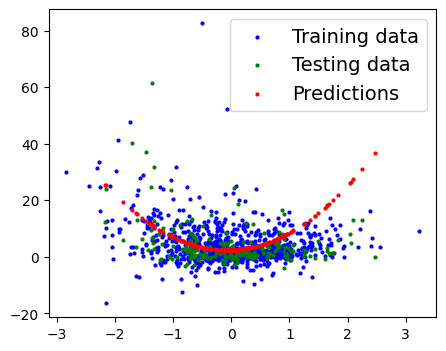

In [172]:
plot_predictions(X_train, y_train, X_test, y_test, y_preds)
plot_predictions(X3_train,y3_train, X3_test, y3_test, y3_preds)
plot_predictions(X4_train,y4_train, X4_test, y4_test, y4_preds)


### Creating loss function 

In [163]:
loss_function = nn.MSELoss() # Mean Absolute Error

In [164]:
optimizer = torch.optim.SGD(model_1.parameters(),lr=0.001,)

In [165]:
def train(
        model: nn.Module,
        train_data: torch.Tensor,
        train_labels: torch.Tensor,
        test_data: torch.Tensor,
        test_labels: torch.Tensor,
        loss_function: nn.Module,
        optimizer: torch.optim.Optimizer,
        epochs: int,
    ):
    epochs_count ,train_loss_arr, test_loss_arr = [], [], []
    for epoch in range(epochs+1):
        model.train()
        y_pred = model(train_data)
        loss = loss_function(y_pred, train_labels)
        loss.backward()

        optimizer.step()
        optimizer.zero_grad()

        model.eval()
        with torch.inference_mode():
            y_pred = model(test_data)
            test_loss = loss_function(y_pred, test_labels)

        if epoch % 10 == 0:
            epochs_count.append(epoch)
            train_loss_arr.append(loss.detach().numpy())
            test_loss_arr.append(test_loss.detach().numpy())
            print(f"Epoch {epoch}: MAE Loss: {loss.item():0.2f} | Test Loss: {test_loss.item():0.2f}")
    return epochs_count, train_loss_arr, test_loss_arr


In [174]:

epochs_count, train_loss, test_loss = train(
                                        model_1, 
                                        train_data=X_train, 
                                        train_labels=y_train, 
                                        test_data=X_test, 
                                        test_labels=y_test, 
                                        loss_function=loss_function, 
                                        optimizer=optimizer, 
                                        epochs=1000
                                    )

epochs_count, train_loss, test_loss = train(
                                        model_1, 
                                        train_data=X3_train, 
                                        train_labels=y3_train, 
                                        test_data=X3_test, 
                                        test_labels=y3_test, 
                                        loss_function=loss_function, 
                                        optimizer=optimizer, 
                                        epochs=1000
                                    )

epochs_count, train_loss, test_loss = train(
                                        model_1, 
                                        train_data=X4_train, 
                                        train_labels=y4_train, 
                                        test_data=X4_test, 
                                        test_labels=y4_test, 
                                        loss_function=loss_function, 
                                        optimizer=optimizer, 
                                        epochs=1000
                                    )


Epoch 0: MAE Loss: 44.83 | Test Loss: 36.91
Epoch 10: MAE Loss: 44.20 | Test Loss: 36.44
Epoch 20: MAE Loss: 43.58 | Test Loss: 35.99
Epoch 30: MAE Loss: 42.98 | Test Loss: 35.54
Epoch 40: MAE Loss: 42.40 | Test Loss: 35.11
Epoch 50: MAE Loss: 41.83 | Test Loss: 34.69
Epoch 60: MAE Loss: 41.28 | Test Loss: 34.28
Epoch 70: MAE Loss: 40.74 | Test Loss: 33.89
Epoch 80: MAE Loss: 40.22 | Test Loss: 33.50
Epoch 90: MAE Loss: 39.71 | Test Loss: 33.12
Epoch 100: MAE Loss: 39.21 | Test Loss: 32.75
Epoch 110: MAE Loss: 38.73 | Test Loss: 32.40
Epoch 120: MAE Loss: 38.26 | Test Loss: 32.05
Epoch 130: MAE Loss: 37.80 | Test Loss: 31.71
Epoch 140: MAE Loss: 37.36 | Test Loss: 31.37
Epoch 150: MAE Loss: 36.92 | Test Loss: 31.05
Epoch 160: MAE Loss: 36.50 | Test Loss: 30.74
Epoch 170: MAE Loss: 36.09 | Test Loss: 30.43
Epoch 180: MAE Loss: 35.69 | Test Loss: 30.13
Epoch 190: MAE Loss: 35.30 | Test Loss: 29.83
Epoch 200: MAE Loss: 34.92 | Test Loss: 29.55
Epoch 210: MAE Loss: 34.54 | Test Loss: 29.27

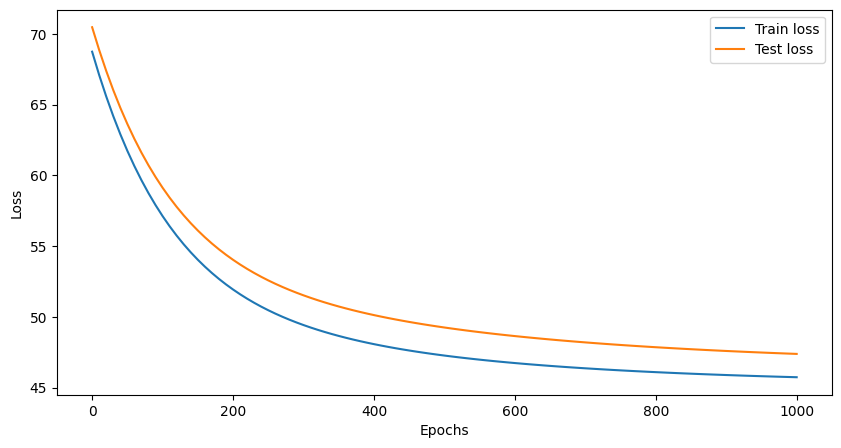

In [175]:
def plot_stats(
        epochs: list,
        train_loss: list,
        test_loss: list,
    ):
    plt.figure(figsize=(10, 5))
    plt.plot(epochs, train_loss, label='Train loss')
    plt.plot(epochs, test_loss, label='Test loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()

plot_stats(epochs_count, train_loss, test_loss)


In [176]:
def predict(model, X):
    with torch.inference_mode():
        y_pred = model(X)
        return y_pred
    
y_preds = predict(model_1, X_test)
print(f"Predicted values: {y_preds}")
y3_preds = predict(model_1, X3_test)
print(f"Predicted values: {y3_preds}")
y4_preds = predict(model_1, X4_test)
print(f"Predicted values: {y4_preds}")

Predicted values: tensor([ 3.1890, 10.2947,  3.5881,  2.3144,  2.2957,  2.7385,  2.1987,  4.2021,
         2.1677,  2.1580,  5.2721,  2.1874,  3.0844,  2.7182,  6.6081,  2.5369,
         2.1423,  2.2647,  3.3096,  5.1693,  2.2301,  2.2846,  2.1391,  2.2781,
         3.1904,  2.2011,  4.3407,  2.7103,  2.1820,  5.6121,  2.1532,  2.1594,
         2.1434,  3.3149,  3.9238,  2.2744,  2.9185,  4.1977,  3.7794,  2.1483,
         6.2570,  2.2305,  2.1559,  4.5136,  2.1411,  2.4572,  3.5834,  4.5154,
         2.1519,  3.3691,  2.7415,  3.2156,  3.9376,  3.3122,  4.6057,  6.3959,
         4.3822,  9.8181,  3.5483,  5.5059,  2.3016,  4.0990,  3.1052,  2.2934,
         2.5244,  2.8543,  3.7807,  2.1478,  2.1547,  2.6064,  2.6629,  2.1660,
         2.1499,  2.1796,  2.1725,  2.2214,  3.4176,  2.7475,  2.1947,  2.7415,
         7.0148,  2.1390,  4.0220,  2.3789,  5.6348,  2.3670,  2.1399,  2.3678,
         2.2667,  4.5830,  2.5252,  2.5097,  2.3657,  4.2124,  3.4143,  2.7509,
         2.1390,  2.14

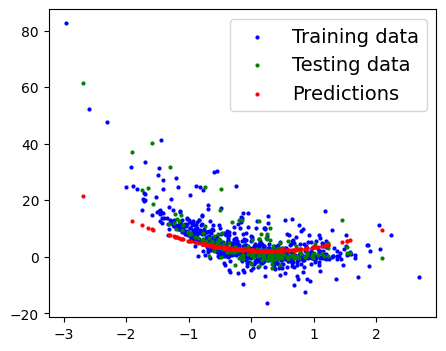

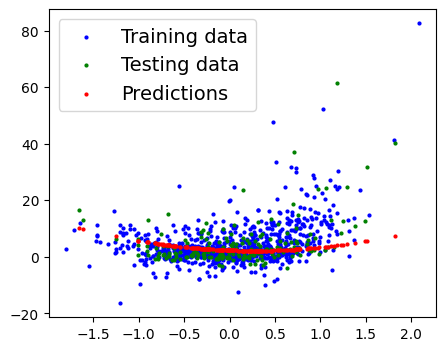

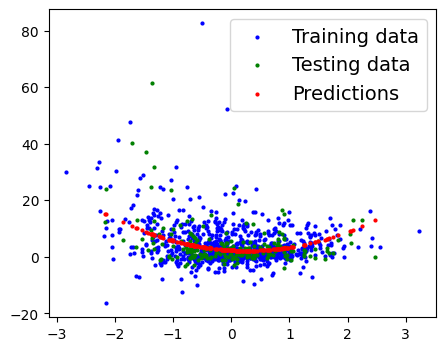

In [177]:
plot_predictions(
    train_data=X_train,
    train_labels=y_train,
    test_data=X_test,
    test_labels=y_test,
    predictions=y_preds,
)

plot_predictions(
    train_data=X3_train,
    train_labels=y3_train,
    test_data=X3_test,
    test_labels=y3_test,
    predictions=y3_preds,
)

plot_predictions(
    train_data=X4_train,
    train_labels=y4_train,
    test_data=X4_test,
    test_labels=y4_test,
    predictions=y4_preds,
)



In [178]:
print(f"Model Parameters: {model_1.state_dict()}")

Model Parameters: OrderedDict([('a', tensor([2.2151])), ('b', tensor([-1.1914])), ('c', tensor([2.2991]))])


In [179]:
# Saving model1
from pathlib import Path

# Create a folder to save our models
model_path = Path('ML Task 1 Asmaa')
model_path.mkdir(parents=True, exist_ok=True)

# Save the model
model_name = 'model_1.pth'
model_save_path = model_path / model_name

print(f"Saving model to: {model_save_path}")
torch.save(model_1.state_dict(), model_save_path)

Saving model to: ML Task 1 Asmaa\model_1.pth


## Building Model 2

In [133]:
#using Linear Regression Model
import torch
import torch.nn as nn
class LinearRegressionModel(nn.Module):
    def __init__(self, *args, **kwargs) -> None:
        super().__init__(*args, **kwargs)
        self.slope = nn.Parameter(torch.randn(1, 
            requires_grad=True, 
            dtype=torch.float32 
        ))
        self.intercept = nn.Parameter(torch.randn(1, 
            requires_grad=True, 
            dtype=torch.float32 
        ))
    def forward(self, x: torch.Tensor):
        y = x*self.slope+self.intercept #linear formula: y=mx+c
        return y

In [134]:
model_2= LinearRegressionModel()
print(f"Model_1 Parameters: {list(model_1.parameters())}")
print('-------------------------')
print(f"Named Parameters: {model_1.state_dict()}")

Model_1 Parameters: [Parameter containing:
tensor([3.5701], requires_grad=True), Parameter containing:
tensor([-4.2615], requires_grad=True), Parameter containing:
tensor([2.1419], requires_grad=True)]
-------------------------
Named Parameters: OrderedDict([('a', tensor([3.5701])), ('b', tensor([-4.2615])), ('c', tensor([2.1419]))])


In [149]:
#predicting y values (from linear equation)
with torch.inference_mode():
    y2_preds = model_2(X2_test)

print(f"Predicted values: {y2_preds}")

with torch.inference_mode():
    y5_preds = model_2(X5_test)

print(f"Predicted values: {y5_preds}")

Predicted values: tensor([ 5.0679,  9.2428,  6.4387,  1.2787,  5.7917,  4.0931,  1.7196,  1.1495,
         8.9961,  5.1798, -0.9011,  1.9111,  1.6815,  5.7881,  4.9896,  2.1482,
         7.8131,  2.4643,  2.1092,  4.1790,  2.1582, -0.0339, -0.7546,  6.9753,
         5.4336,  6.4110,  5.4478,  5.0960,  1.1628,  2.6911,  4.3514, -1.3378,
         2.9101,  3.0650,  6.0020,  5.8274,  4.9381,  4.2711,  0.8362,  4.5982,
         6.4627,  5.7551,  6.2254,  9.8700,  3.3204,  2.7833,  6.8551,  3.8417,
         0.7547,  4.2492,  4.7187,  4.9259,  6.1802,  3.9949,  5.1950,  9.4545,
        11.4502,  8.5620,  5.1787,  4.8107,  1.7670,  9.0666,  2.4725,  2.4991,
         4.0028,  4.2247,  9.3400,  0.6991, 11.8492, -3.2449,  4.5404,  2.7574,
        -0.2324,  4.4084,  2.3701,  9.9057,  1.7654,  6.1050, -0.7095,  0.9762,
        -0.8991,  3.4175,  2.4632,  2.6610,  0.0153,  3.1969,  0.4366,  2.2496,
         6.4785,  6.6137,  7.1676,  7.4852,  5.4250,  1.0153, 10.0860,  7.6799,
         5.2497,  4.07

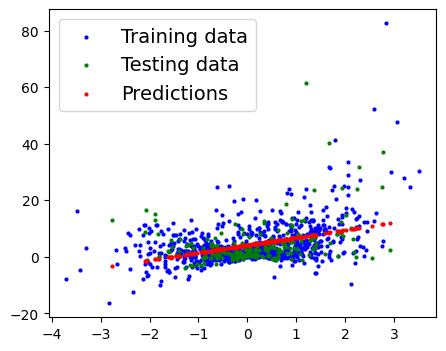

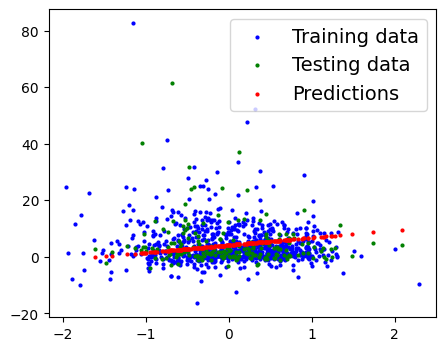

In [151]:
plot_predictions(X2_train, y2_train, X2_test, y2_test, y2_preds)
plot_predictions(X5_train, y5_train, X5_test, y5_test, y5_preds)



In [142]:
# Creating loss function 
loss_function = nn.MSELoss() # Mean Absolute Error
optimizer = torch.optim.SGD(model_2.parameters(),lr=0.001,)

In [153]:
epochs_count, train_loss, test_loss = train(
                                        model_2, 
                                        train_data=X2_train, 
                                        train_labels=y2_train, 
                                        test_data=X2_test, 
                                        test_labels=y2_test, 
                                        loss_function=loss_function, 
                                        optimizer=optimizer, 
                                        epochs=1000
                                    )

epochs_count, train_loss, test_loss = train(
                                        model_2, 
                                        train_data=X5_train, 
                                        train_labels=y5_train, 
                                        test_data=X5_test, 
                                        test_labels=y5_test, 
                                        loss_function=loss_function, 
                                        optimizer=optimizer, 
                                        epochs=1000
                                    )

Epoch 0: MAE Loss: 48.26 | Test Loss: 53.75
Epoch 10: MAE Loss: 47.96 | Test Loss: 53.53
Epoch 20: MAE Loss: 47.67 | Test Loss: 53.33
Epoch 30: MAE Loss: 47.40 | Test Loss: 53.14
Epoch 40: MAE Loss: 47.15 | Test Loss: 52.95
Epoch 50: MAE Loss: 46.91 | Test Loss: 52.78
Epoch 60: MAE Loss: 46.68 | Test Loss: 52.62
Epoch 70: MAE Loss: 46.46 | Test Loss: 52.47
Epoch 80: MAE Loss: 46.25 | Test Loss: 52.32
Epoch 90: MAE Loss: 46.06 | Test Loss: 52.19
Epoch 100: MAE Loss: 45.87 | Test Loss: 52.06
Epoch 110: MAE Loss: 45.70 | Test Loss: 51.94
Epoch 120: MAE Loss: 45.53 | Test Loss: 51.83
Epoch 130: MAE Loss: 45.37 | Test Loss: 51.72
Epoch 140: MAE Loss: 45.22 | Test Loss: 51.62
Epoch 150: MAE Loss: 45.08 | Test Loss: 51.52
Epoch 160: MAE Loss: 44.95 | Test Loss: 51.43
Epoch 170: MAE Loss: 44.82 | Test Loss: 51.35
Epoch 180: MAE Loss: 44.70 | Test Loss: 51.27
Epoch 190: MAE Loss: 44.58 | Test Loss: 51.20
Epoch 200: MAE Loss: 44.48 | Test Loss: 51.13
Epoch 210: MAE Loss: 44.37 | Test Loss: 51.06

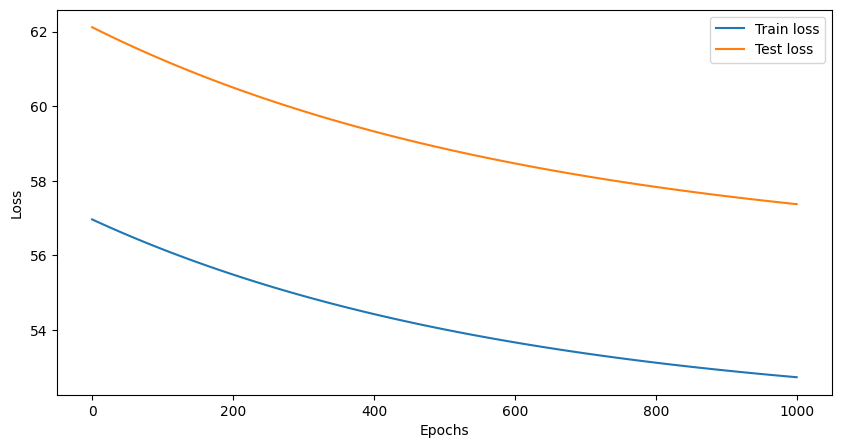

In [156]:
def plot_stats(
        epochs: list,
        train_loss: list,
        test_loss: list,
    ):
    plt.figure(figsize=(10, 5))
    plt.plot(epochs, train_loss, label='Train loss')
    plt.plot(epochs, test_loss, label='Test loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()

plot_stats(epochs_count, train_loss, test_loss)

In [158]:
def predict(model, X):
    with torch.inference_mode():
        y_pred = model(X)
        return y_pred
    
y2_preds = predict(model_2, X2_test)
print(f"Predicted values: {y2_preds}")

y5_preds = predict(model_2, X5_test)
print(f"Predicted values: {y5_preds}")

Predicted values: tensor([4.4826, 5.3434, 4.7653, 3.7013, 4.6318, 4.2816, 3.7922, 3.6747, 5.2926,
        4.5057, 3.2518, 3.8317, 3.7844, 4.6311, 4.4665, 3.8806, 5.0486, 3.9458,
        3.8725, 4.2993, 3.8826, 3.4307, 3.2820, 4.8759, 4.5580, 4.7595, 4.5609,
        4.4884, 3.6774, 3.9925, 4.3349, 3.1618, 4.0377, 4.0696, 4.6752, 4.6392,
        4.4558, 4.3183, 3.6100, 4.3857, 4.7702, 4.6243, 4.7213, 5.4728, 4.1223,
        4.0115, 4.8511, 4.2298, 3.5933, 4.3138, 4.4106, 4.4533, 4.7119, 4.2614,
        4.5088, 5.3871, 5.7986, 5.2031, 4.5054, 4.4296, 3.8020, 5.3071, 3.9475,
        3.9529, 4.2630, 4.3087, 5.3635, 3.5818, 5.8809, 2.7686, 4.3738, 4.0062,
        3.3897, 4.3466, 3.9263, 5.4801, 3.8017, 4.6965, 3.2913, 3.6389, 3.2522,
        4.1423, 3.9455, 3.9863, 3.4408, 4.0968, 3.5277, 3.9015, 4.7735, 4.8013,
        4.9156, 4.9810, 4.5562, 3.6470, 5.5173, 5.0212, 4.5201, 4.2769, 5.3391,
        4.7859, 4.7787, 5.0335, 4.5119, 4.1537, 4.0036, 3.1314, 4.2928, 4.5422,
        4.7867, 4.6920

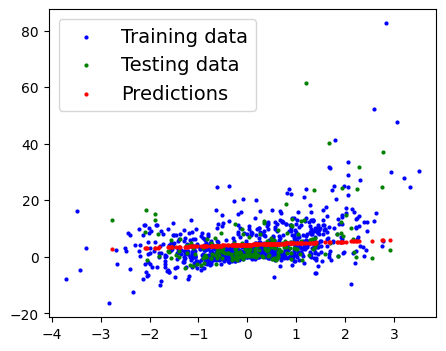

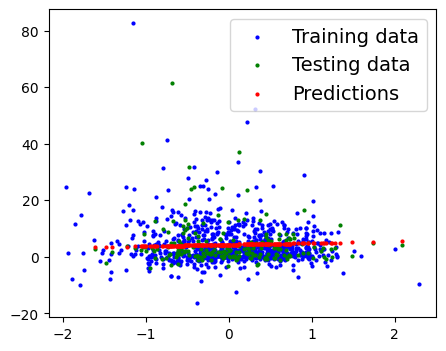

In [159]:
plot_predictions(
    train_data=X2_train,
    train_labels=y2_train,
    test_data=X2_test,
    test_labels=y2_test,
    predictions=y2_preds,
)

plot_predictions(
    train_data=X5_train,
    train_labels=y5_train,
    test_data=X5_test,
    test_labels=y5_test,
    predictions=y5_preds,
)


In [147]:
print(f"Model Parameters: {model_2.state_dict()}")

Model Parameters: OrderedDict([('slope', tensor([2.6591])), ('intercept', tensor([4.1039]))])


In [160]:
# Saving model2
from pathlib import Path

# Create a folder to save our models
model_path = Path('ML Task 1 Asmaa')
model_path.mkdir(parents=True, exist_ok=True)

# Save the model
model_name = 'model_2.pth'
model_save_path = model_path / model_name

print(f"Saving model to: {model_save_path}")
torch.save(model_2.state_dict(), model_save_path)

Saving model to: ML Task 1 Asmaa\model_2.pth
